In [1]:
%pwd

'/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/notebooks'

In [2]:
%cd ..

/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization


In [3]:
%ls

README.md                jobs/                    tasks.py
Untitled.ipynb           models.py                tests/
__init__.py              multi_material_train.py  tf.py
__pycache__/             notebooks/               topo_api.py
buyun_test/              problems.py              topo_physics.py
experiments.py           pygranso_demo.py         train.py
frames/                  raw_data/                utils/
ideas.py                 results/                 utils.py
images/                  structural_opt.png


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import colors

import multi_material_train
import problems
import topo_physics

In [5]:
# Setup problem and device
device = torch.device('cpu')
problem = problems.multi_material_tip_cantilever(
    height=32, width=96, density=0.5, device=device
)
problem.name = 'test-multi-material'
e_materials = np.array([3.0, 2.0, 1.0])
num_materials = len(e_materials)
volfrac = np.array([1.0, 0.7, 0.4])
combined_volfrac = 0.60
penal = 3.0

# CNN Multi-Material

In [6]:
# Run the multi-material problem
model_type = 'cnn'
model, ke, args, soln = multi_material_train.train_mass_constrained_multi_material(
    problem=problem,
    model_type=model_type,
    e_materials=e_materials,
    num_materials=num_materials,
    volfrac=volfrac,
    combined_volfrac=combined_volfrac,
    penal=penal,
)

/Users/ryandevera/data-science/tesorio/NCVX-Neural-Structural-Optimization/topo_physics.py:622: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x_phys = softmax(logits)
/Users/ryandevera/.virtualenvs/ncvx/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]




╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                                             ║ 
Version 1.2.0                                                                                                    ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang                                  ║ 
═════════════════════════════════════════════

/Users/ryandevera/.virtualenvs/ncvx/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║ 0.478297 │  0.22686962381 ║  0.31406588528 ║   -  │ 0.076653 ║ S  │     2 │ 0.200000 ║     1 │ 0.002940   ║ 
   3 ║ 0.478297 │  0.12522468769 ║  0.22336915416 ║   -  │ 0.018388 ║ S  │     5 │ 1.600000 ║     1 │ 0.001678   ║ 
   4 ║ 0.478297 │  0.11140292036 ║  0.21474184295 ║   -  │ 0.008693 ║ S  │     5 │ 1.600000 ║     1 │ 0.001583   ║ 
   5 ║ 0.478297 │  0.10191092923 ║  0.20290555421 ║   -  │ 0.004862 ║ S  │     5 │ 1.600000 ║     1 │ 0.001833   ║ 
   6 ║ 0.478297 │  0.09784419442 ║  0.19903907961 ║   -  │ 0.002644 ║ S  │     5 │ 1.600000 ║     1 │ 0.002231   ║ 
   7 ║ 0.478297 │  0.09383902294 ║  0.19254226492 ║   -  │ 0.001747 ║ S  │     5 │ 1.600000 ║     1 │ 0.002604   ║ 
   8 ║ 0.478297 │  0.09020799360 ║  0.18663976380 ║   -  │ 9.39e-04 ║ S  │     5 │ 1.600000 ║     1 │ 0.002959   ║ 
   9 ║ 0.478297 │  0.08783653250 ║  0.18356909964 ║   -  │ 3.60e-05 ║ S  │     4 │ 0.800000 ║     1 │ 0.003995   ║ 
  10 ║ 0.478297 │  0.08723876281 ║  0.18221787226 ║   -  │ 8.45e-05 ║ S 

In [7]:
# Evaluate the outputs
model.eval()
with torch.no_grad():
    final_compliance, final_design = topo_physics.calculate_multi_material_compliance(
        model, ke, args, device=device, dtype=torch.double
    )
    final_design = final_design.detach().cpu().numpy()

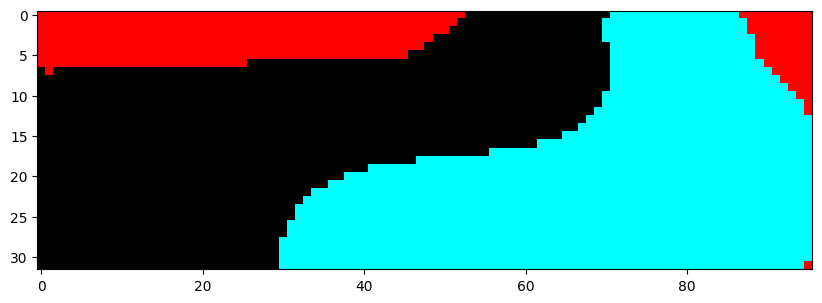

In [10]:
# Plot the outputs
fillColors = ["0.90", "red", "cyan", "black"]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.imshow(
    np.argmax(final_design, axis=0),
    cmap=colors.ListedColormap(fillColors),
    vmin=0,
    vmax=3
)

# MLP Multi-Material

In [11]:
# Run the multi-material problem
model_type = 'mlp'
model, ke, args, soln = multi_material_train.train_mass_constrained_multi_material(
    problem=problem,
    model_type=model_type,
    e_materials=e_materials,
    num_materials=num_materials,
    volfrac=volfrac,
    combined_volfrac=combined_volfrac,
    penal=penal,
)



╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
═════════════════════════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                                             ║ 
Version 1.2.0                                                                                                    ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang                                  ║ 
═════════════════════════════════════════════

In [12]:
# Evaluate the outputs
model.eval()
with torch.no_grad():
    final_compliance, final_design = topo_physics.calculate_multi_material_compliance(
        model, ke, args, device=device, dtype=torch.double
    )
    final_design = final_design.detach().cpu().numpy()

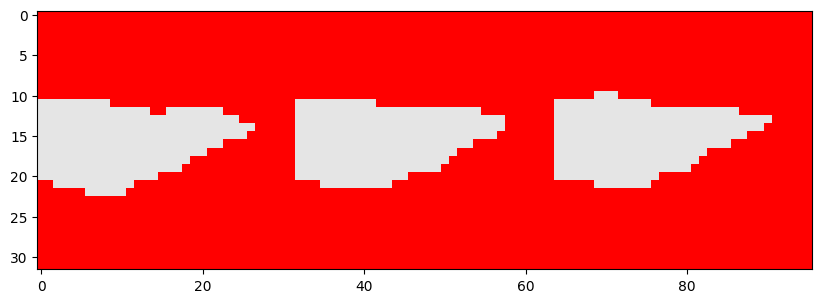

In [13]:
# Plot the outputs
fillColors = ["0.90", "red", "cyan", "black"]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.imshow(
    np.argmax(final_design, axis=0),
    cmap=colors.ListedColormap(fillColors),
    vmin=0,
    vmax=3
)